In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use Scikit-Learn's set of pre-formatted digits, which is built into the library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [7]:
digits.images.shape      
#1,797 samples each consisting of an 8 × 8 grid of pixels.

(1797, 8, 8)

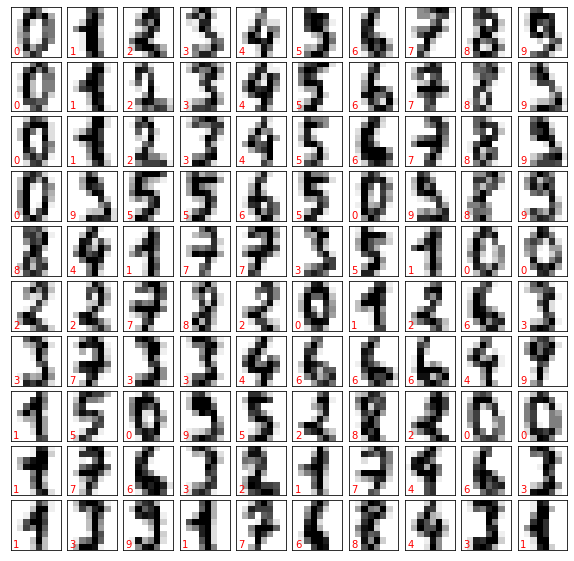

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(10,10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='red')

In order to work with this data within Scikit-Learn, we need a two-dimensional, [n_samples, n_features] representation. We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit. Additionally, we need the target array, which gives the previously determined label for each digit. These two quantities are built into the digits dataset under the data and target attributes, respectively:

In [12]:
X = digits.data
X.shape

(1797, 64)

In [13]:
y = digits.target
y.shape

(1797,)

Dimensionality reduction from 64D to 2D using manifold learning algorithm called Isomap (Unsupervised learning)

In [14]:
from sklearn.manifold import Isomap

In [20]:
iso = Isomap(n_components = 2)
iso.fit(digits.data)

Isomap()

In [21]:
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

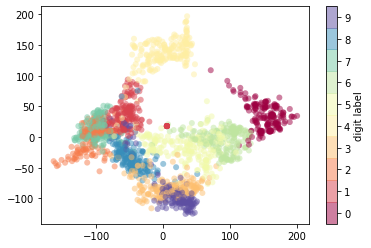

In [23]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [25]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [26]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

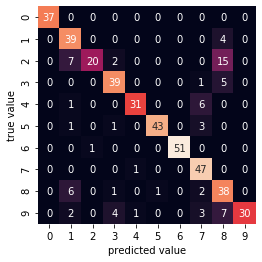

In [28]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

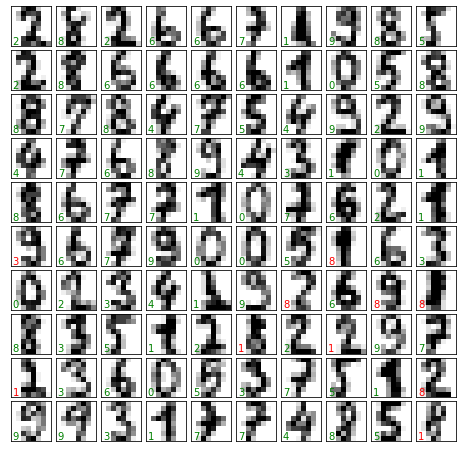

In [29]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')